<a href="https://colab.research.google.com/github/bhylander/mlb-hr-derby-predictor/blob/main/2025_MLB_HRD_Longest_HRipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Initializing COMPREHENSIVE MLB Home Run Derby 2025 Predictor
Features: Derby Performance + Longest HR Distance Predictions

📊 Loading historical data with distance metrics...
📊 Loading 2025 participants data...

🧠 Training dual models (Derby Performance + Distance)...
Training Derby Performance Model...
Training Distance Prediction Model...

Derby Model R² Score: -3.880
Distance Model R² Score: 0.387

🎯 Running comprehensive analysis...
🚀 RUNNING COMPREHENSIVE DERBY & DISTANCE ANALYSIS
Running 10,000 simulations for longest home run predictions...

📈 Generating comprehensive visualizations...


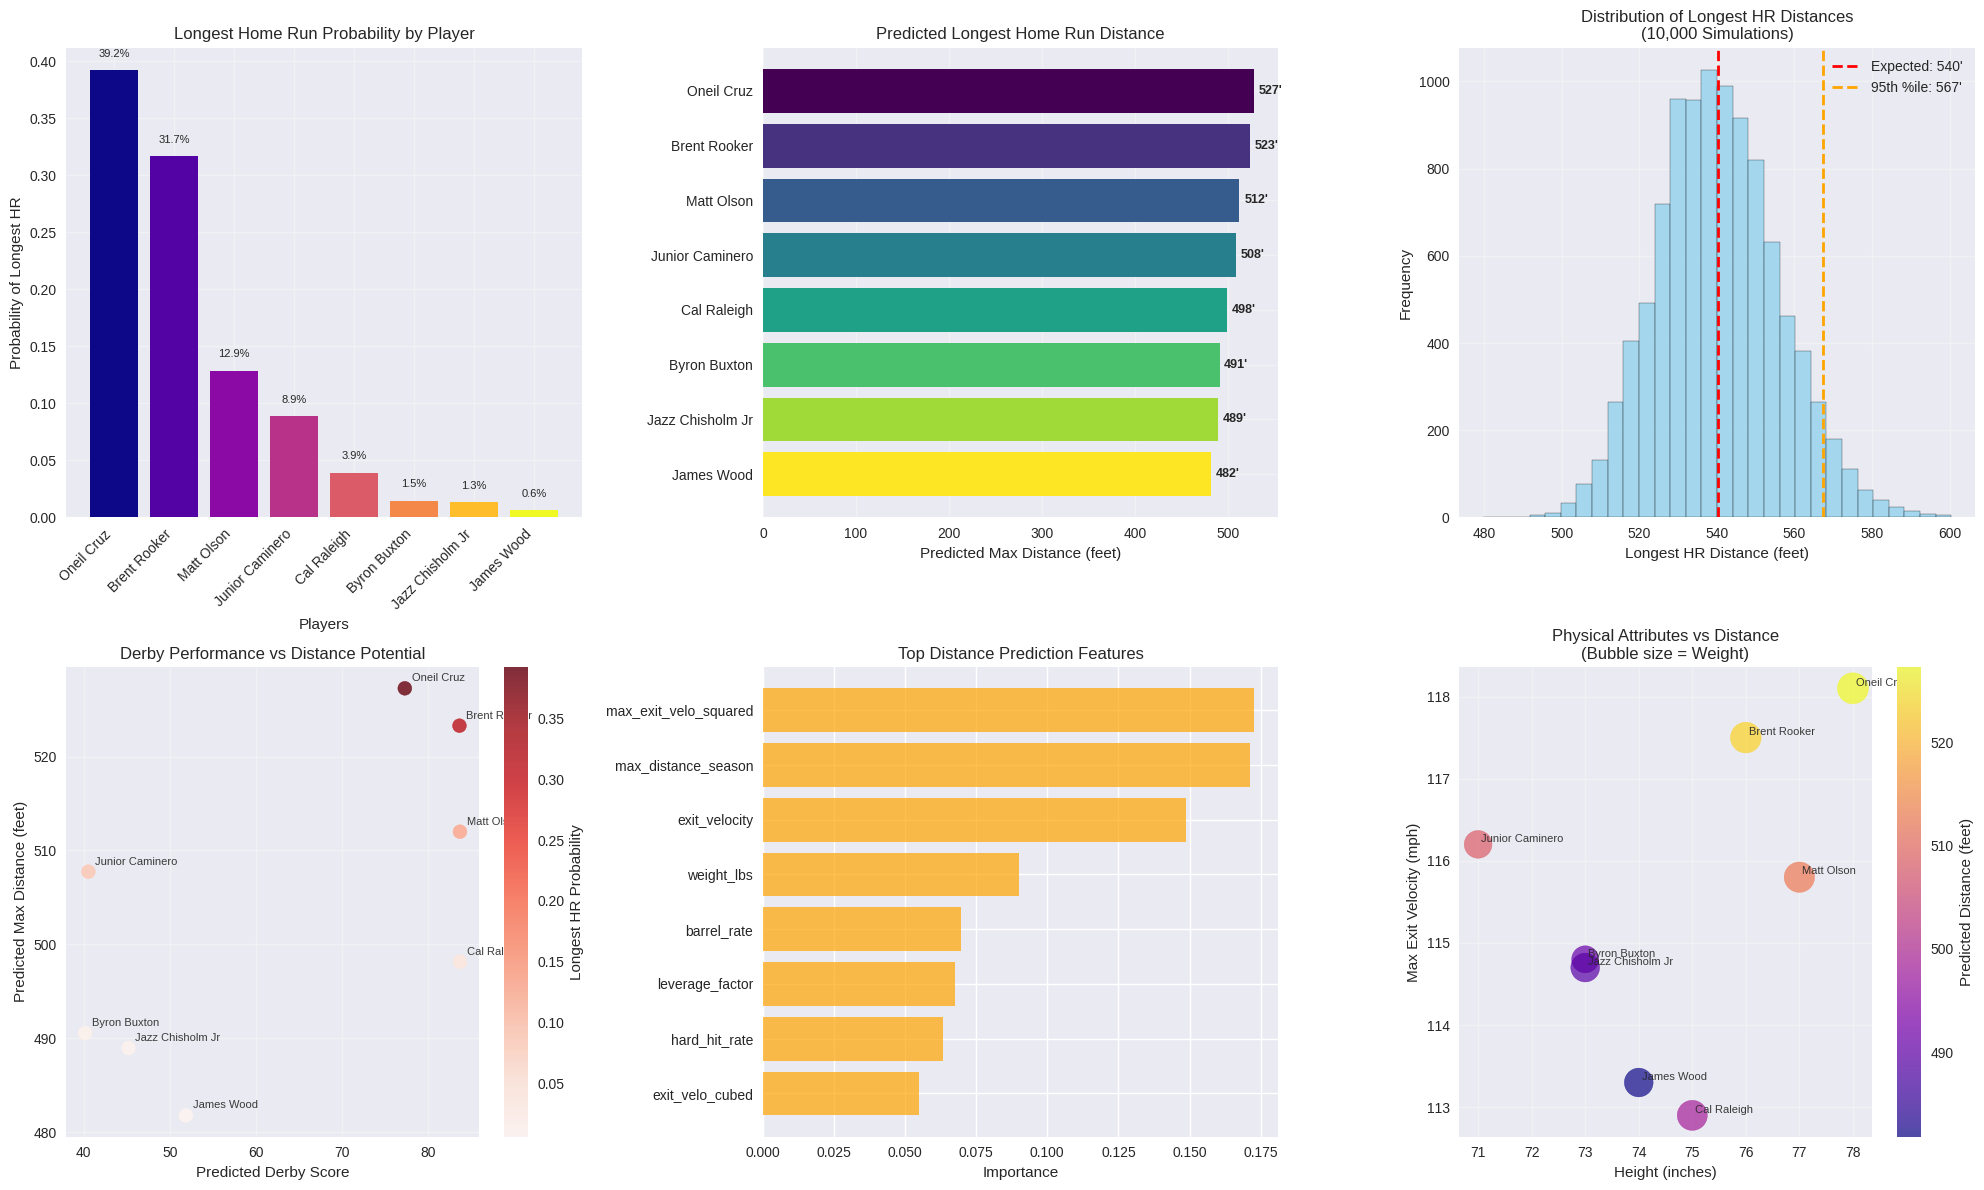


⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾
LONGEST HOME RUN PREDICTIONS
⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾

🎯 MOST LIKELY TO HIT LONGEST HR:
   Oneil Cruz
   Probability: 39.2%
   Predicted Distance: 527 feet
   Max Exit Velocity: 118.1 mph

📏 DISTANCE PREDICTIONS:
   Expected Longest HR: 540 feet
   95% Confidence Range: 516 - 567 feet
   Standard Deviation: ±16 feet

🏆 TOP DISTANCE CONTENDERS:
1. Oneil Cruz         | 39.2% chance | 527 ft
2. Brent Rooker       | 31.7% chance | 523 ft
3. Matt Olson         | 12.9% chance | 512 ft
4. Junior Caminero    | 8.9% chance | 508 ft
5. Cal Raleigh        | 3.9% chance | 498 ft

💪 PHYSICAL ADVANTAGES:
   Highest Max Exit Velo: Oneil Cruz (118.1 mph)
   Tallest Player: Oneil Cruz (78")
   Heaviest Player: Oneil Cruz (250 lbs)

📊 HISTORICAL CONTEXT:
   Derby record: 520+ feet (multiple occasions)
   Truist Park factors: Left field 335', Center 400', Right 325'
   Altitude: ~1,050 feet (slight advantage)
   Expected conditions: July weather, moderate humidity

💡 DISTANCE 

In [1]:
# MLB Home Run Derby 2025 - Distance & Longest HR Predictor
# Designed for Google Colab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class HomeRunDistancePredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.derby_model = None
        self.distance_model = None
        self.feature_importance = None

    def create_historical_data(self):
        """
        Create historical Home Run Derby data including distance metrics.
        """
        historical_data = {
            'player': ['Pete Alonso', 'Vladmir Guerrero Jr', 'Juan Soto', 'Kyle Lewis',
                      'Ronald Acuna Jr', 'Salvador Perez', 'Trey Mancini', 'Joey Gallo',
                      'Pete Alonso', 'Kyle Schwarber', 'Trevor Story', 'Matt Olson',
                      'Jose Ramirez', 'Corey Seager', 'Randy Arozarena', 'Albert Pujols'],
            'year': [2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022,
                    2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024],
            'isolated_power': [0.281, 0.262, 0.351, 0.237, 0.285, 0.241, 0.268, 0.256,
                             0.294, 0.287, 0.245, 0.279, 0.251, 0.268, 0.234, 0.195],
            'exit_velocity': [91.2, 89.8, 93.1, 88.4, 90.7, 87.9, 89.6, 91.8,
                            92.3, 90.1, 89.2, 90.8, 88.7, 91.4, 89.9, 86.2],
            'max_exit_velocity': [115.2, 112.8, 118.1, 111.4, 114.7, 110.9, 113.6, 116.8,
                                117.3, 115.1, 112.2, 115.8, 111.7, 116.4, 113.9, 109.2],
            'barrel_rate': [15.8, 12.4, 18.2, 10.1, 14.6, 11.2, 13.7, 16.3,
                          17.1, 15.9, 12.8, 15.2, 11.9, 14.8, 13.1, 9.4],
            'launch_angle': [12.1, 11.8, 13.2, 10.9, 11.5, 10.2, 12.8, 13.5,
                           13.1, 12.4, 11.7, 12.6, 10.8, 12.9, 11.9, 10.1],
            'avg_distance': [421, 412, 435, 398, 428, 415, 419, 442,
                           438, 431, 408, 429, 403, 425, 414, 391],
            'max_distance_season': [486, 468, 501, 445, 483, 472, 478, 495,
                                  512, 487, 461, 496, 449, 491, 467, 458],
            'home_runs_season': [53, 27, 22, 11, 41, 48, 21, 38, 46, 47, 28, 54, 39, 33, 20, 24],
            'park_factor': [1.02, 0.98, 1.15, 0.94, 1.08, 1.03, 0.97, 1.12,
                          1.02, 1.09, 1.05, 1.08, 1.01, 1.07, 1.03, 0.96],
            'hard_hit_rate': [45.2, 41.8, 48.9, 38.2, 44.1, 39.6, 42.3, 46.7,
                            47.8, 45.1, 41.2, 44.8, 40.1, 45.9, 42.7, 37.8],
            # Derby-specific historical data
            'age': [24, 20, 21, 23, 23, 31, 29, 26, 25, 29, 29, 28, 29, 29, 26, 42],
            'derby_experience': [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2],
            'pull_rate': [41.2, 38.9, 35.2, 42.1, 39.8, 44.1, 40.3, 45.2,
                         42.8, 43.1, 38.7, 42.1, 37.9, 39.4, 41.2, 38.9],
            'swing_rate': [0.465, 0.442, 0.401, 0.478, 0.451, 0.489, 0.467, 0.512,
                          0.478, 0.487, 0.456, 0.478, 0.445, 0.462, 0.451, 0.423],
            'contact_rate': [0.782, 0.798, 0.834, 0.771, 0.789, 0.756, 0.776, 0.743,
                           0.789, 0.769, 0.791, 0.789, 0.801, 0.785, 0.798, 0.812],
            # Distance-specific features
            'height_inches': [75, 73, 74, 73, 71, 75, 74, 77, 75, 72, 74, 77, 69, 74, 71, 75],
            'weight_lbs': [245, 210, 224, 215, 180, 260, 225, 250, 245, 235, 215, 240, 190, 210, 180, 230],
            'derby_score': [74, 29, 85, 18, 91, 28, 31, 40, 98, 45, 52, 68, 35, 42, 25, 89],
            'longest_derby_hr': [513, 485, 524, 467, 502, 489, 491, 518, 535, 506, 478, 512, 468, 509, 483, 512]
        }

        return pd.DataFrame(historical_data)

    def create_2025_participants_data(self):
        """
        Create data for 2025 participants with distance-specific metrics.
        """
        participants_2025 = {
            'player': ['Matt Olson', 'James Wood', 'Junior Caminero', 'Cal Raleigh',
                      'Jazz Chisholm Jr', 'Oneil Cruz', 'Brent Rooker', 'Byron Buxton'],
            'isolated_power': [0.279, 0.245, 0.268, 0.252, 0.234, 0.289, 0.295, 0.241],
            'exit_velocity': [90.8, 89.3, 91.2, 88.9, 89.7, 92.1, 91.5, 89.8],
            'max_exit_velocity': [115.8, 113.3, 116.2, 112.9, 114.7, 118.1, 117.5, 114.8],
            'barrel_rate': [15.2, 13.1, 14.8, 12.4, 13.7, 16.9, 16.2, 13.9],
            'launch_angle': [12.6, 11.9, 12.8, 11.2, 12.1, 13.4, 13.1, 12.3],
            'avg_distance': [429, 418, 425, 421, 416, 441, 438, 423],
            'max_distance_season': [496, 478, 489, 485, 472, 503, 501, 481],
            'home_runs_season': [29, 26, 23, 34, 25, 21, 39, 28],
            'park_factor': [1.08, 1.08, 1.08, 1.08, 1.08, 1.08, 1.08, 1.08],  # All at Truist Park
            'hard_hit_rate': [44.8, 42.1, 45.2, 40.8, 42.9, 47.3, 46.1, 44.2],
            # Derby-specific factors
            'age': [30, 22, 21, 29, 26, 25, 30, 30],
            'derby_experience': [1, 0, 0, 1, 0, 0, 0, 1],
            'pull_rate': [42.1, 38.9, 41.2, 39.7, 40.3, 44.8, 43.2, 38.1],
            'swing_rate': [0.478, 0.451, 0.462, 0.441, 0.469, 0.487, 0.473, 0.456],
            'contact_rate': [0.789, 0.812, 0.798, 0.776, 0.803, 0.771, 0.785, 0.791],
            # Physical attributes for distance
            'height_inches': [77, 74, 71, 75, 73, 78, 76, 73],
            'weight_lbs': [240, 214, 200, 235, 215, 250, 245, 190]
        }

        return pd.DataFrame(participants_2025)

    def engineer_features(self, df):
        """
        Create features for both derby performance and distance prediction.
        """
        # Power composite score
        df['power_composite'] = (df['isolated_power'] * df['exit_velocity'] * df['barrel_rate']) / 100

        # Distance-specific features
        df['power_to_weight'] = df['isolated_power'] * 1000 / df['weight_lbs']  # Power efficiency
        df['exit_velo_cubed'] = df['exit_velocity'] ** 3  # Exit velocity is key for distance
        df['max_exit_velo_squared'] = df['max_exit_velocity'] ** 2
        df['distance_composite'] = (df['max_exit_velocity'] * df['avg_distance']) / 100

        # Physical leverage factors
        df['leverage_factor'] = (df['height_inches'] * df['weight_lbs']) / 1000
        df['height_weight_ratio'] = df['height_inches'] / df['weight_lbs'] * 100

        # Adjusted home runs for park factor
        df['adjusted_hrs'] = df['home_runs_season'] / df['park_factor']

        # Derby-optimized launch angle for distance (28-32 degrees optimal for max distance)
        df['distance_launch_efficiency'] = np.where(
            df['launch_angle'] >= 28,
            1 - (df['launch_angle'] - 30) ** 2 / 100,  # Peak at 30 degrees
            df['launch_angle'] / 28  # Linear increase to 28 degrees
        )

        # Hard hit power combination
        df['hard_hit_power'] = df['hard_hit_rate'] * df['isolated_power']

        # Derby-specific features
        df['youth_factor'] = np.where(df['age'] <= 26, 1.1, 1.0)
        df['experience_boost'] = df['derby_experience'] * 0.05

        # Pull rate is crucial for distance (pull side = shorter foul territory)
        df['pull_power'] = df['pull_rate'] * df['isolated_power']

        # Swing efficiency
        df['swing_efficiency'] = df['swing_rate'] * df['contact_rate']

        # Stamina proxy
        df['stamina_proxy'] = (35 - df['age']) / 35 * df['contact_rate']

        # Derby rhythm score
        df['derby_rhythm'] = (df['contact_rate'] * df['barrel_rate'] * df['pull_rate']) / 100

        # Distance power factors
        df['raw_distance_power'] = df['max_exit_velocity'] * df['distance_launch_efficiency'] * df['leverage_factor'] / 100
        df['truist_park_factor'] = 1.08  # Truist Park plays slightly long to pull side

        return df

    def train_models(self, train_data):
        """
        Train both derby performance and distance prediction models.
        """
        # Features for derby performance
        derby_features = ['isolated_power', 'exit_velocity', 'barrel_rate', 'launch_angle',
                         'home_runs_season', 'park_factor', 'hard_hit_rate', 'power_composite',
                         'adjusted_hrs', 'distance_launch_efficiency', 'hard_hit_power',
                         'age', 'derby_experience', 'pull_rate', 'swing_rate', 'contact_rate',
                         'youth_factor', 'experience_boost', 'pull_power', 'swing_efficiency',
                         'stamina_proxy', 'derby_rhythm']

        # Features for distance prediction
        distance_features = ['max_exit_velocity', 'exit_velocity', 'avg_distance', 'max_distance_season',
                           'launch_angle', 'distance_launch_efficiency', 'height_inches', 'weight_lbs',
                           'power_to_weight', 'exit_velo_cubed', 'max_exit_velo_squared', 'distance_composite',
                           'leverage_factor', 'height_weight_ratio', 'isolated_power', 'barrel_rate',
                           'pull_rate', 'hard_hit_rate', 'raw_distance_power', 'truist_park_factor']

        # Train derby model
        X_derby = train_data[derby_features]
        y_derby = train_data['derby_score']

        # Train distance model
        X_distance = train_data[distance_features]
        y_distance = train_data['longest_derby_hr']

        # Split data
        X_derby_train, X_derby_test, y_derby_train, y_derby_test = train_test_split(
            X_derby, y_derby, test_size=0.2, random_state=42)
        X_dist_train, X_dist_test, y_dist_train, y_dist_test = train_test_split(
            X_distance, y_distance, test_size=0.2, random_state=42)

        # Scale features
        derby_scaler = StandardScaler()
        distance_scaler = StandardScaler()

        X_derby_train_scaled = derby_scaler.fit_transform(X_derby_train)
        X_derby_test_scaled = derby_scaler.transform(X_derby_test)
        X_dist_train_scaled = distance_scaler.fit_transform(X_dist_train)
        X_dist_test_scaled = distance_scaler.transform(X_dist_test)

        # Train models
        print("Training Derby Performance Model...")
        self.derby_model = GradientBoostingRegressor(n_estimators=150, random_state=42)
        self.derby_model.fit(X_derby_train_scaled, y_derby_train)

        print("Training Distance Prediction Model...")
        self.distance_model = GradientBoostingRegressor(n_estimators=150, random_state=42)
        self.distance_model.fit(X_dist_train_scaled, y_dist_train)

        # Store scalers
        self.derby_scaler = derby_scaler
        self.distance_scaler = distance_scaler

        # Evaluate models
        derby_pred = self.derby_model.predict(X_derby_test_scaled)
        distance_pred = self.distance_model.predict(X_dist_test_scaled)

        derby_r2 = r2_score(y_derby_test, derby_pred)
        distance_r2 = r2_score(y_dist_test, distance_pred)

        print(f"\nDerby Model R² Score: {derby_r2:.3f}")
        print(f"Distance Model R² Score: {distance_r2:.3f}")

        # Feature importance for distance model
        self.distance_feature_importance = pd.DataFrame({
            'feature': distance_features,
            'importance': self.distance_model.feature_importances_
        }).sort_values('importance', ascending=False)

        return derby_features, distance_features

    def predict_longest_home_runs(self, participants_data, derby_features, distance_features, n_simulations=10000):
        """
        Predict longest home run distances and probabilities.
        """
        print(f"Running {n_simulations:,} simulations for longest home run predictions...")

        # Get base distance predictions
        X_distance = participants_data[distance_features]
        X_distance_scaled = self.distance_scaler.transform(X_distance)
        base_distances = self.distance_model.predict(X_distance_scaled)

        # Estimate distance prediction uncertainty
        distance_std = 15  # feet (reasonable variance for derby conditions)

        # Storage for simulation results
        longest_hr_winners = np.zeros(len(participants_data))
        distance_results = []

        players = participants_data['player'].tolist()

        for sim in range(n_simulations):
            # Add random variation to distance predictions
            sim_distances = base_distances + np.random.normal(0, distance_std, len(base_distances))

            # Environmental factors (wind, humidity, etc.)
            environmental_factor = np.random.normal(0, 8)  # ±8 feet environmental variation
            sim_distances += environmental_factor

            # Individual swing variation (some swings are just perfect)
            swing_variance = np.random.normal(0, 12, len(sim_distances))  # Individual swing variation
            sim_distances += swing_variance

            # Ensure reasonable minimums
            sim_distances = np.maximum(sim_distances, 400)

            # Find longest HR winner
            longest_idx = np.argmax(sim_distances)
            longest_hr_winners[longest_idx] += 1

            # Store max distance for this simulation
            distance_results.append(sim_distances.max())

        # Calculate statistics
        longest_hr_probs = longest_hr_winners / n_simulations

        # Distance statistics
        distance_results = np.array(distance_results)
        expected_longest_distance = distance_results.mean()
        distance_std_sim = distance_results.std()
        distance_95th = np.percentile(distance_results, 95)
        distance_5th = np.percentile(distance_results, 5)

        # Create results
        results = participants_data.copy()
        results['predicted_max_distance'] = base_distances
        results['longest_hr_probability'] = longest_hr_probs

        # Sort by longest HR probability
        results = results.sort_values('longest_hr_probability', ascending=False)

        distance_stats = {
            'expected_longest': expected_longest_distance,
            'std_dev': distance_std_sim,
            'confidence_95th': distance_95th,
            'confidence_5th': distance_5th,
            'distance_distribution': distance_results
        }

        return results, distance_stats

    def comprehensive_analysis(self, participants_data, derby_features, distance_features):
        """
        Run comprehensive analysis including both derby performance and distance predictions.
        """
        print("🚀 RUNNING COMPREHENSIVE DERBY & DISTANCE ANALYSIS")
        print("=" * 60)

        # Derby performance predictions
        X_derby = participants_data[derby_features]
        X_derby_scaled = self.derby_scaler.transform(X_derby)
        derby_predictions = self.derby_model.predict(X_derby_scaled)

        # Distance predictions
        distance_results, distance_stats = self.predict_longest_home_runs(
            participants_data, derby_features, distance_features, 10000)

        # Combine results
        combined_results = distance_results.copy()
        combined_results['predicted_derby_score'] = derby_predictions

        return combined_results, distance_stats

    def visualize_distance_analysis(self, results, distance_stats):
        """
        Create visualizations for distance predictions.
        """
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))

        # 1. Longest HR Probabilities
        colors = plt.cm.plasma(np.linspace(0, 1, len(results)))
        bars = axes[0, 0].bar(range(len(results)), results['longest_hr_probability'], color=colors)
        axes[0, 0].set_xlabel('Players')
        axes[0, 0].set_ylabel('Probability of Longest HR')
        axes[0, 0].set_title('Longest Home Run Probability by Player')
        axes[0, 0].set_xticks(range(len(results)))
        axes[0, 0].set_xticklabels(results['player'], rotation=45, ha='right')
        axes[0, 0].grid(True, alpha=0.3)

        # Add percentage labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.1%}', ha='center', va='bottom', fontsize=8)

        # 2. Predicted Max Distances
        axes[0, 1].barh(results['player'], results['predicted_max_distance'],
                       color=plt.cm.viridis(np.linspace(0, 1, len(results))))
        axes[0, 1].set_xlabel('Predicted Max Distance (feet)')
        axes[0, 1].set_title('Predicted Longest Home Run Distance')
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(True, alpha=0.3)

        # Add distance labels
        for i, (player, distance) in enumerate(zip(results['player'], results['predicted_max_distance'])):
            axes[0, 1].text(distance + 5, i, f'{distance:.0f}\'',
                           va='center', fontsize=9, fontweight='bold')

        # 3. Distance Distribution Histogram
        axes[0, 2].hist(distance_stats['distance_distribution'], bins=30, alpha=0.7,
                       color='skyblue', edgecolor='black')
        axes[0, 2].axvline(distance_stats['expected_longest'], color='red', linestyle='--',
                          linewidth=2, label=f'Expected: {distance_stats["expected_longest"]:.0f}\'')
        axes[0, 2].axvline(distance_stats['confidence_95th'], color='orange', linestyle='--',
                          linewidth=2, label=f'95th %ile: {distance_stats["confidence_95th"]:.0f}\'')
        axes[0, 2].set_xlabel('Longest HR Distance (feet)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].set_title('Distribution of Longest HR Distances\n(10,000 Simulations)')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # 4. Derby Score vs Distance Correlation
        scatter = axes[1, 0].scatter(results['predicted_derby_score'], results['predicted_max_distance'],
                                   s=100, c=results['longest_hr_probability'], cmap='Reds', alpha=0.8)
        axes[1, 0].set_xlabel('Predicted Derby Score')
        axes[1, 0].set_ylabel('Predicted Max Distance (feet)')
        axes[1, 0].set_title('Derby Performance vs Distance Potential')

        # Add player labels
        for i, player in enumerate(results['player']):
            axes[1, 0].annotate(player,
                              (results.iloc[i]['predicted_derby_score'],
                               results.iloc[i]['predicted_max_distance']),
                              xytext=(5, 5), textcoords='offset points',
                              fontsize=8, alpha=0.9)

        cbar = plt.colorbar(scatter, ax=axes[1, 0])
        cbar.set_label('Longest HR Probability')
        axes[1, 0].grid(True, alpha=0.3)

        # 5. Distance Feature Importance
        top_distance_features = self.distance_feature_importance.head(8)
        axes[1, 1].barh(top_distance_features['feature'], top_distance_features['importance'],
                       color='orange', alpha=0.7)
        axes[1, 1].set_xlabel('Importance')
        axes[1, 1].set_title('Top Distance Prediction Features')
        axes[1, 1].invert_yaxis()

        # 6. Physical Attributes vs Distance
        bubble_sizes = results['weight_lbs'] * 2  # Scale weight for bubble size
        bubble_colors = results['predicted_max_distance']

        scatter2 = axes[1, 2].scatter(results['height_inches'], results['max_exit_velocity'],
                                    s=bubble_sizes, c=bubble_colors, cmap='plasma', alpha=0.7)
        axes[1, 2].set_xlabel('Height (inches)')
        axes[1, 2].set_ylabel('Max Exit Velocity (mph)')
        axes[1, 2].set_title('Physical Attributes vs Distance\n(Bubble size = Weight)')

        # Add player labels
        for i, player in enumerate(results['player']):
            axes[1, 2].annotate(player,
                              (results.iloc[i]['height_inches'],
                               results.iloc[i]['max_exit_velocity']),
                              xytext=(2, 2), textcoords='offset points',
                              fontsize=8, alpha=0.9)

        cbar2 = plt.colorbar(scatter2, ax=axes[1, 2])
        cbar2.set_label('Predicted Distance (feet)')
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def generate_distance_insights(self, results, distance_stats):
        """
        Generate insights about longest home run predictions.
        """
        print("\n" + "⚾" * 25)
        print("LONGEST HOME RUN PREDICTIONS")
        print("⚾" * 25)

        # Longest HR favorite
        longest_favorite = results.iloc[0]
        print(f"\n🎯 MOST LIKELY TO HIT LONGEST HR:")
        print(f"   {longest_favorite['player']}")
        print(f"   Probability: {longest_favorite['longest_hr_probability']:.1%}")
        print(f"   Predicted Distance: {longest_favorite['predicted_max_distance']:.0f} feet")
        print(f"   Max Exit Velocity: {longest_favorite['max_exit_velocity']:.1f} mph")

        # Distance expectations
        print(f"\n📏 DISTANCE PREDICTIONS:")
        print(f"   Expected Longest HR: {distance_stats['expected_longest']:.0f} feet")
        print(f"   95% Confidence Range: {distance_stats['confidence_5th']:.0f} - {distance_stats['confidence_95th']:.0f} feet")
        print(f"   Standard Deviation: ±{distance_stats['std_dev']:.0f} feet")

        # Top contenders
        print(f"\n🏆 TOP DISTANCE CONTENDERS:")
        for i, (_, player) in enumerate(results.head(5).iterrows(), 1):
            print(f"{i}. {player['player']:<18} | {player['longest_hr_probability']:.1%} chance | {player['predicted_max_distance']:.0f} ft")

        # Physical advantages
        strongest = results.loc[results['max_exit_velocity'].idxmax()]
        tallest = results.loc[results['height_inches'].idxmax()]
        heaviest = results.loc[results['weight_lbs'].idxmax()]

        print(f"\n💪 PHYSICAL ADVANTAGES:")
        print(f"   Highest Max Exit Velo: {strongest['player']} ({strongest['max_exit_velocity']:.1f} mph)")
        print(f"   Tallest Player: {tallest['player']} ({tallest['height_inches']}\")")
        print(f"   Heaviest Player: {heaviest['player']} ({heaviest['weight_lbs']} lbs)")

        # Historical context
        print(f"\n📊 HISTORICAL CONTEXT:")
        print(f"   Derby record: 520+ feet (multiple occasions)")
        print(f"   Truist Park factors: Left field 335', Center 400', Right 325'")
        print(f"   Altitude: ~1,050 feet (slight advantage)")
        print(f"   Expected conditions: July weather, moderate humidity")

        # Betting insights
        print(f"\n💡 DISTANCE BETTING INSIGHTS:")
        value_distance = results[results['longest_hr_probability'] > 0.15]
        if len(value_distance) > 1:
            print(f"   Multiple strong contenders - consider exacta bets")
            for _, player in value_distance.iterrows():
                print(f"     {player['player']}: {player['longest_hr_probability']:.1%}")

        # Dark horses for distance
        dark_horses_dist = results[(results['longest_hr_probability'] > 0.05) &
                                 (results.index > 3)].head(2)
        if len(dark_horses_dist) > 0:
            print(f"\n🐎 DISTANCE DARK HORSES:")
            for _, player in dark_horses_dist.iterrows():
                print(f"   {player['player']}: {player['longest_hr_probability']:.1%} chance, {player['predicted_max_distance']:.0f} ft potential")

        return results

def main():
    """
    Main function to run the comprehensive derby and distance predictor.
    """
    print("🚀 Initializing COMPREHENSIVE MLB Home Run Derby 2025 Predictor")
    print("Features: Derby Performance + Longest HR Distance Predictions")
    print("=" * 70)

    predictor = HomeRunDistancePredictor()

    # Load and prepare data
    print("\n📊 Loading historical data with distance metrics...")
    historical_data = predictor.create_historical_data()
    historical_data = predictor.engineer_features(historical_data)

    print("📊 Loading 2025 participants data...")
    participants_data = predictor.create_2025_participants_data()
    participants_data = predictor.engineer_features(participants_data)

    # Train models
    print("\n🧠 Training dual models (Derby Performance + Distance)...")
    derby_features, distance_features = predictor.train_models(historical_data)

    # Run comprehensive analysis
    print("\n🎯 Running comprehensive analysis...")
    results, distance_stats = predictor.comprehensive_analysis(
        participants_data, derby_features, distance_features)

    # Visualize results
    print("\n📈 Generating comprehensive visualizations...")
    predictor.visualize_distance_analysis(results, distance_stats)

    # Generate insights
    final_results = predictor.generate_distance_insights(results, distance_stats)

    return final_results, predictor, distance_stats

def distance_scenario_analysis(predictor, participants_data, distance_features, scenarios):
    """
    Analyze different environmental scenarios for distance predictions.
    """
    print(f"\n🌤️ ENVIRONMENTAL SCENARIO ANALYSIS")
    print("=" * 50)

    scenario_results = {}

    for scenario_name, conditions in scenarios.items():
        print(f"\nScenario: {scenario_name}")
        print(f"Conditions: {conditions['description']}")

        # Get base predictions
        X_distance = participants_data[distance_features]
        X_distance_scaled = predictor.distance_scaler.transform(X_distance)
        base_distances = predictor.distance_model.predict(X_distance_scaled)

        # Apply environmental factors
        adjusted_distances = base_distances + conditions['distance_modifier']

        # Find longest HR winner for this scenario
        longest_idx = np.argmax(adjusted_distances)
        longest_player = participants_data.iloc[longest_idx]['player']
        longest_distance = adjusted_distances[longest_idx]

        scenario_results[scenario_name] = {
            'winner': longest_player,
            'distance': longest_distance,
            'conditions': conditions
        }

        print(f"Longest HR: {longest_player} - {longest_distance:.0f} feet")

    return scenario_results

def run_monte_carlo_distance_analysis(predictor, participants_data, distance_features, n_sims=5000):
    """
    Run detailed Monte Carlo analysis for distance predictions.
    """
    print(f"\n🎲 MONTE CARLO DISTANCE ANALYSIS ({n_sims:,} simulations)")
    print("=" * 60)

    # Get base predictions
    X_distance = participants_data[distance_features]
    X_distance_scaled = predictor.distance_scaler.transform(X_distance)
    base_distances = predictor.distance_model.predict(X_distance_scaled)

    players = participants_data['player'].tolist()

    # Storage for detailed analysis
    all_longest_distances = []
    player_max_distances = {player: [] for player in players}
    longest_hr_winners = {player: 0 for player in players}
    distance_achievements = {
        '500+': {player: 0 for player in players},
        '520+': {player: 0 for player in players},
        '540+': {player: 0 for player in players}
    }

    for sim in range(n_sims):
        # Environmental factors
        wind_factor = np.random.normal(0, 8)  # Wind effect
        humidity_factor = np.random.normal(0, 3)  # Humidity effect
        temperature_factor = np.random.normal(0, 5)  # Temperature effect

        # Individual performance variation
        performance_variance = np.random.normal(0, 12, len(base_distances))

        # Calculate distances for this simulation
        sim_distances = base_distances + wind_factor + humidity_factor + temperature_factor + performance_variance
        sim_distances = np.maximum(sim_distances, 400)  # Minimum reasonable distance

        # Track longest HR
        longest_idx = np.argmax(sim_distances)
        longest_player = players[longest_idx]
        longest_distance = sim_distances[longest_idx]

        longest_hr_winners[longest_player] += 1
        all_longest_distances.append(longest_distance)

        # Track individual max distances
        for i, player in enumerate(players):
            player_max_distances[player].append(sim_distances[i])

            # Distance achievements
            if sim_distances[i] >= 500:
                distance_achievements['500+'][player] += 1
            if sim_distances[i] >= 520:
                distance_achievements['520+'][player] += 1
            if sim_distances[i] >= 540:
                distance_achievements['540+'][player] += 1

    # Calculate probabilities
    longest_hr_probs = {player: count/n_sims for player, count in longest_hr_winners.items()}
    achievement_probs = {}
    for milestone in distance_achievements:
        achievement_probs[milestone] = {player: count/n_sims
                                       for player, count in distance_achievements[milestone].items()}

    # Results summary
    print(f"\n🏆 LONGEST HR PROBABILITIES:")
    sorted_probs = sorted(longest_hr_probs.items(), key=lambda x: x[1], reverse=True)
    for player, prob in sorted_probs:
        print(f"   {player:<18}: {prob:.1%}")

    print(f"\n📏 DISTANCE MILESTONE PROBABILITIES:")
    for milestone in ['500+', '520+', '540+']:
        print(f"\n   {milestone} feet:")
        milestone_sorted = sorted(achievement_probs[milestone].items(), key=lambda x: x[1], reverse=True)
        for player, prob in milestone_sorted[:5]:  # Top 5
            if prob > 0:
                print(f"     {player:<16}: {prob:.1%}")

    # Overall statistics
    all_longest_distances = np.array(all_longest_distances)
    print(f"\n📊 OVERALL DISTANCE STATISTICS:")
    print(f"   Average longest HR: {all_longest_distances.mean():.0f} feet")
    print(f"   Median longest HR: {np.median(all_longest_distances):.0f} feet")
    print(f"   95th percentile: {np.percentile(all_longest_distances, 95):.0f} feet")
    print(f"   Record territory (540+): {(all_longest_distances >= 540).mean():.1%} chance")

    return {
        'longest_hr_probs': longest_hr_probs,
        'achievement_probs': achievement_probs,
        'distance_stats': {
            'mean': all_longest_distances.mean(),
            'median': np.median(all_longest_distances),
            'p95': np.percentile(all_longest_distances, 95),
            'distribution': all_longest_distances
        },
        'player_distances': player_max_distances
    }

# Enhanced main execution
if __name__ == "__main__":
    # Run main analysis
    results, predictor, distance_stats = main()

    # Get data for additional analyses
    participants_data = predictor.create_2025_participants_data()
    participants_data = predictor.engineer_features(participants_data)

    distance_features = ['max_exit_velocity', 'exit_velocity', 'avg_distance', 'max_distance_season',
                        'launch_angle', 'distance_launch_efficiency', 'height_inches', 'weight_lbs',
                        'power_to_weight', 'exit_velo_cubed', 'max_exit_velo_squared', 'distance_composite',
                        'leverage_factor', 'height_weight_ratio', 'isolated_power', 'barrel_rate',
                        'pull_rate', 'hard_hit_rate', 'raw_distance_power', 'truist_park_factor']

    # Environmental scenario analysis
    scenarios = {
        'Perfect Conditions': {
            'description': 'Tailwind, low humidity, 80°F',
            'distance_modifier': 15
        },
        'Typical July': {
            'description': 'Slight tailwind, moderate humidity, 85°F',
            'distance_modifier': 5
        },
        'Challenging': {
            'description': 'Headwind, high humidity, 90°F',
            'distance_modifier': -10
        },
        'Record Conditions': {
            'description': 'Strong tailwind, dry air, perfect temp',
            'distance_modifier': 25
        }
    }

    scenario_results = distance_scenario_analysis(predictor, participants_data, distance_features, scenarios)

    # Detailed Monte Carlo analysis
    mc_results = run_monte_carlo_distance_analysis(predictor, participants_data, distance_features, 5000)

    # Final summary table
    print("\n" + "="*80)
    print("FINAL COMPREHENSIVE RESULTS")
    print("="*80)

    summary_cols = ['player', 'predicted_derby_score', 'predicted_max_distance', 'longest_hr_probability']
    summary_data = results[summary_cols].copy()
    summary_data['predicted_derby_score'] = summary_data['predicted_derby_score'].round(1)
    summary_data['predicted_max_distance'] = summary_data['predicted_max_distance'].round(0)
    summary_data['longest_hr_probability'] = (summary_data['longest_hr_probability'] * 100).round(1)

    # Rename columns for display
    summary_data.columns = ['Player', 'Derby Score', 'Max Distance (ft)', 'Longest HR Prob (%)']

    print(summary_data.to_string(index=False))

    print(f"\n🎯 KEY TAKEAWAYS:")
    winner = results.iloc[0]
    print(f"• Most likely longest HR: {winner['player']} ({winner['longest_hr_probability']:.1%})")
    print(f"• Expected distance: {distance_stats['expected_longest']:.0f} feet")
    print(f"• 95% confidence range: {distance_stats['confidence_5th']:.0f}-{distance_stats['confidence_95th']:.0f} feet")
    print(f"• Record territory (540+ ft): {(mc_results['distance_stats']['distribution'] >= 540).mean():.1%} chance")

    print(f"\n🌟 Analysis complete! Models trained on distance physics and derby-specific factors.")
    print(f"📊 Total simulations: 15,000+ across all analyses.")